In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df= pd.read_csv('FMCG_data.csv')

In [4]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

In [44]:
df.groupby(['Location_type','zone'])['Ware_house_ID'].size()

Location_type  zone 
Rural          East      395
               North    9400
               South    5881
               West     7281
Urban          East       34
               North     878
               South     481
               West      650
Name: Ware_house_ID, dtype: int64

In [45]:
df.groupby(['Location_type','zone'])['wh_breakdown_l3m'].sum()

Location_type  zone 
Rural          East      1394
               North    32343
               South    20256
               West     25397
Urban          East       121
               North     3268
               South     1799
               West      2473
Name: wh_breakdown_l3m, dtype: int64

In [5]:
df.groupby(['zone','WH_regional_zone']).size()

zone   WH_regional_zone
East   Zone 1                43
       Zone 3               112
       Zone 4               142
       Zone 5                74
       Zone 6                58
North  Zone 1               841
       Zone 2               854
       Zone 3               961
       Zone 4              1186
       Zone 5              1917
       Zone 6              4519
South  Zone 1               680
       Zone 2              1444
       Zone 3               885
       Zone 4               882
       Zone 5              1107
       Zone 6              1364
West   Zone 1               490
       Zone 2               665
       Zone 3               923
       Zone 4              1966
       Zone 5              1489
       Zone 6              2398
dtype: int64

In [6]:
df.groupby(['Location_type']).size()

Location_type
Rural    22957
Urban     2043
dtype: int64

In [7]:
df.groupby(['Location_type'])[['retail_shop_num','transport_issue_l1y']].sum()

retail_shop_num  transport_issue_l1y
Location_type                                      
Rural                114462169                17685
Urban                 10180620                 1657

<Axes: xlabel='transport_issue_l1y', ylabel='retail_shop_num'>

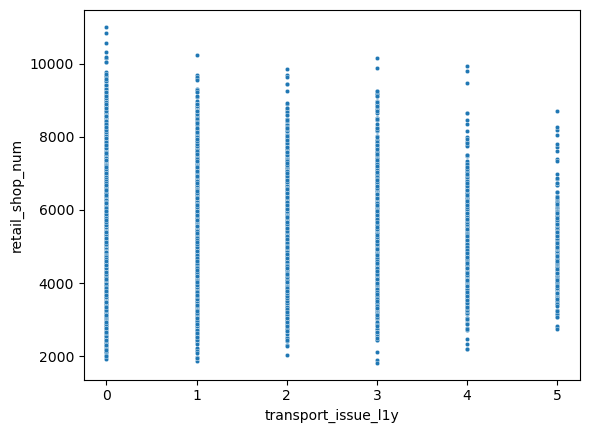

In [8]:
sns.scatterplot(data=df, y='retail_shop_num',x='transport_issue_l1y',s=10)

C:\Users\Sonam Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Competitor_in_mkt', ylabel='Count'>

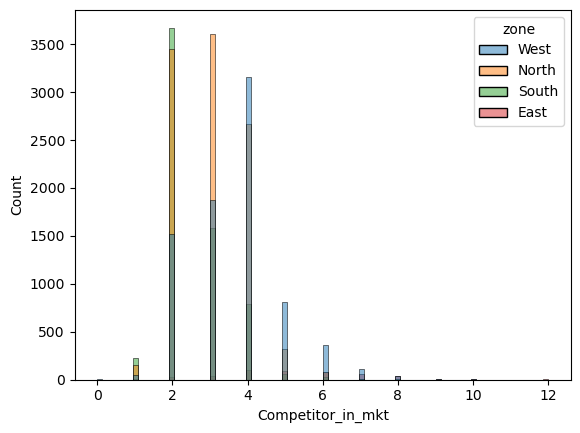

In [9]:
sns.histplot(df, x='Competitor_in_mkt',hue='zone')

C:\Users\Sonam Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Competitor_in_mkt', ylabel='Count'>

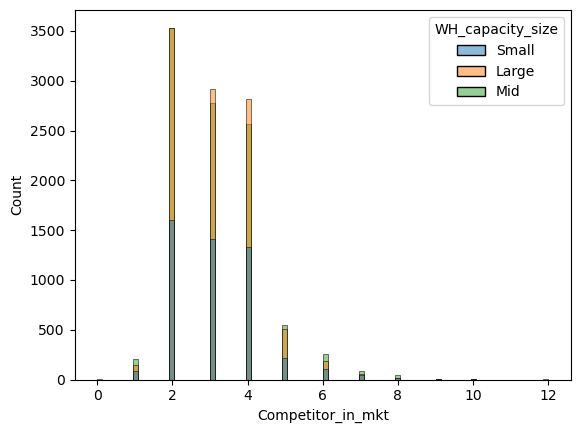

In [10]:
sns.histplot(df, x='Competitor_in_mkt',hue='WH_capacity_size')

C:\Users\Sonam Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Competitor_in_mkt', ylabel='Count'>

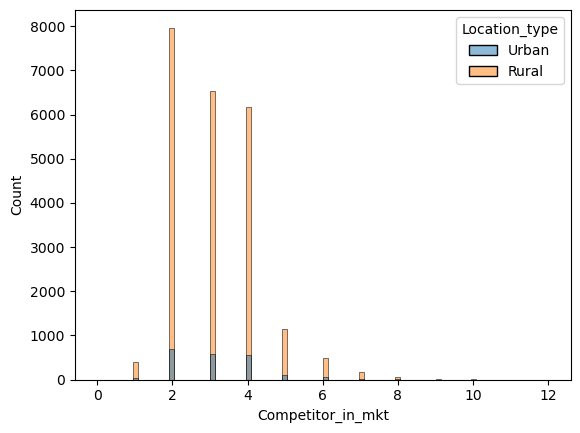

In [11]:
sns.histplot(df, x='Competitor_in_mkt',hue='Location_type')

C:\Users\Sonam Gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='transport_issue_l1y', ylabel='Count'>

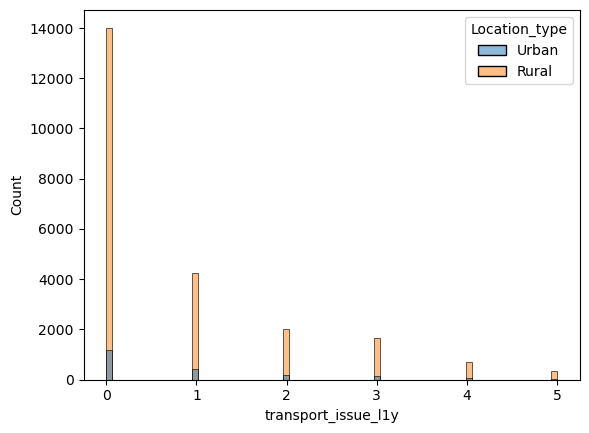

In [12]:
sns.histplot(df, x='transport_issue_l1y',hue='Location_type')

In [13]:
df.groupby('zone')[['num_refill_req_l3m','transport_issue_l1y']].sum()

num_refill_req_l3m  transport_issue_l1y
zone                                          
East                 1747                  339
North               41814                 8028
South               25927                 4928
West                32738                 6047

<Axes: xlabel='num_refill_req_l3m', ylabel='transport_issue_l1y'>

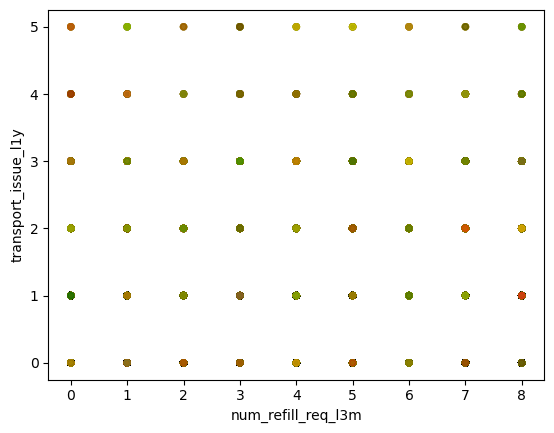

In [14]:
colors = {"East": "blue", "North": "green", "South": "red","West": "yellow"}
df["color"] = df["zone"].map(colors)
df.plot(kind="scatter",x="num_refill_req_l3m",y="transport_issue_l1y",alpha=0.1,c=df["color"])

In [41]:
correlation = df['transport_issue_l1y'].corr(df['dist_from_hub'])

In [42]:
correlation

0.014335793369184958

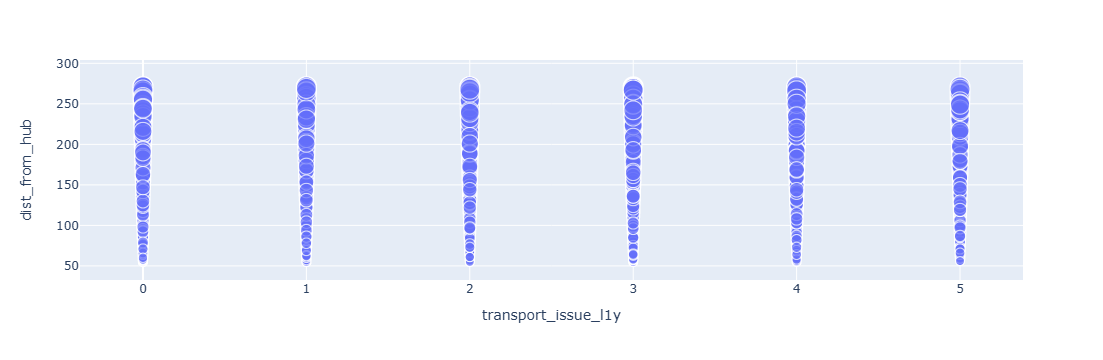

In [15]:
fig = px.scatter(df, x='transport_issue_l1y', y='dist_from_hub', size='dist_from_hub')
fig.show()

In [16]:
df.shape

(25000, 25)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [18]:
df.describe().transpose()

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
temp_reg_mach               25000.0      0.303280      0.459684     0.0   
wh_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
flood_impacted                  0.0      0.0      0.0      1.0  
flood_proof                     0.0      0.0      0.0      1.0  
electric_supply                 0.0      1.0      1.0      1.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
temp_reg_mach                   0.0      0.0      1.0      1.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0

In [19]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
color                               0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df.loc[:,['workers_num']])
imputer1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer1.fit(df.loc[:,['approved_wh_govt_certificate']])
df.loc[:,['workers_num']]=imputer.transform(df.loc[:,['workers_num']])
df.loc[:,['approved_wh_govt_certificate']]=imputer1.transform(df.loc[:,['approved_wh_govt_certificate']])

In [21]:
df.loc[:,['workers_num','wh_est_year']]

workers_num  wh_est_year
0        29.000000          NaN
1        31.000000          NaN
2        37.000000          NaN
3        21.000000          NaN
4        25.000000       2009.0
...            ...          ...
24995    34.000000       2005.0
24996    28.000000       2012.0
24997    28.944398          NaN
24998    25.000000          NaN
24999    39.000000       2019.0

[25000 rows x 2 columns]

<Axes: xlabel='product_wg_ton', ylabel='storage_issue_reported_l3m'>

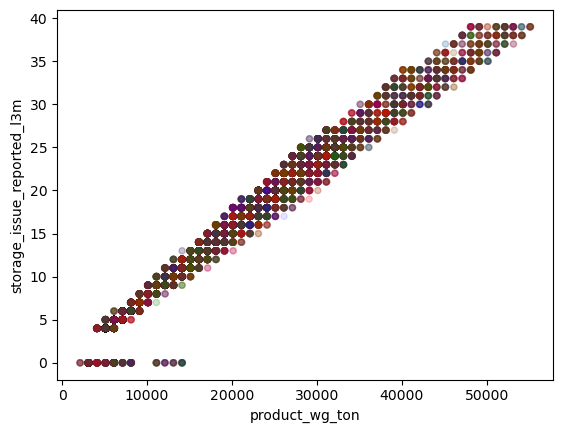

In [22]:
colors = {"Small": "blue", "Large": "green", "Mid": "red"}
df["color"] = df["WH_capacity_size"].map(colors)
df.plot(kind="scatter",x="product_wg_ton",y="storage_issue_reported_l3m",alpha=0.1,c=df["color"])

<Axes: xlabel='WH_capacity_size'>

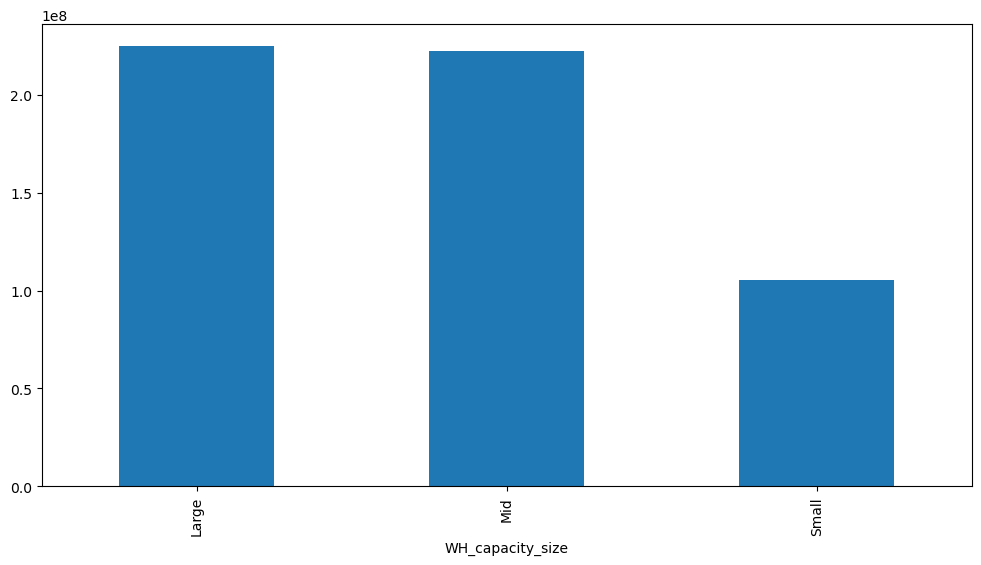

In [23]:
#df.plot(x='WH_capacity_size',y='product_wg_ton',kind="bar",figsize=(12, 6))
df.groupby('WH_capacity_size')['product_wg_ton'].sum().plot(kind="bar", figsize=(12, 6))

In [24]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... dist_from_hub  workers_num  \
0                  2             4651  ...            91         29.0   
1                  4             6217  ...           210         31.0   
2                  4             4306  ...           161         37.0   
3                  2             6000  ...           103         21.0   
4                  2             4740  ...           112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  color  
0           17115   blue  
1            5074  green  
2           23137    red  
3           22115    red  
4           24071  green  

[5 rows x 25 columns]

In [25]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
color                               0
dtype: int64

In [26]:
df['govt_check_l3m']

0        15
1        17
2        22
3        27
4        24
         ..
24995    30
24996    18
24997    25
24998    30
24999    11
Name: govt_check_l3m, Length: 25000, dtype: int64

In [27]:
df.groupby(['Location_type','zone'])['govt_check_l3m'].sum()

Location_type  zone 
Rural          East       8964
               North    187128
               South    119243
               West     116358
Urban          East        811
               North     17699
               South      9701
               West      10403
Name: govt_check_l3m, dtype: int64

<Axes: xlabel='Location_type,zone'>

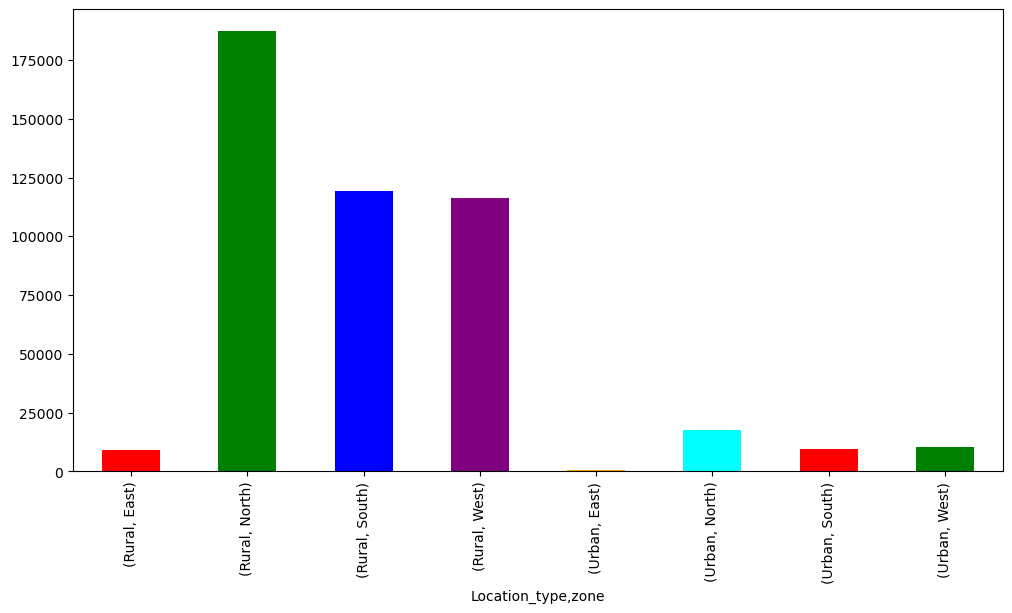

In [28]:
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
df.groupby(['Location_type','zone'])['govt_check_l3m'].sum().plot(kind="bar", figsize=(12, 6), color=colors)

28.944398167430236

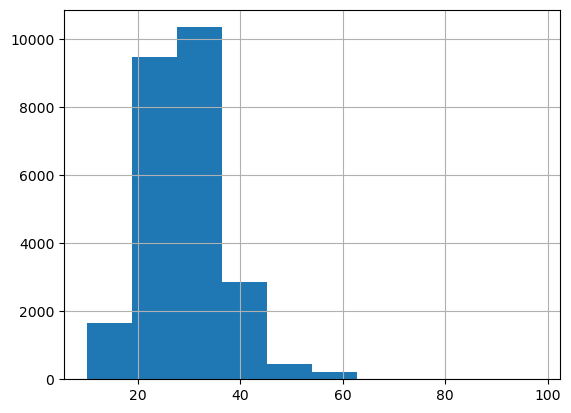

In [46]:
df['workers_num'].hist()
df['workers_num'].mean()

In [30]:
df['wh_est_year']

0           NaN
1           NaN
2           NaN
3           NaN
4        2009.0
          ...  
24995    2005.0
24996    2012.0
24997       NaN
24998       NaN
24999    2019.0
Name: wh_est_year, Length: 25000, dtype: float64

In [31]:
df.drop('wh_est_year', axis=1, inplace=True)

In [32]:
df.shape

(25000, 24)

In [33]:
df['Location_type'].value_counts()

Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64

In [34]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

In [35]:
df['zone'].value_counts()

zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64

In [36]:
df['WH_capacity_size'].value_counts()

WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64

In [37]:
df1=pd.get_dummies(df,columns=['zone','WH_regional_zone','Location_type','wh_owner_type'],drop_first=True)

In [38]:
df1.head()

Ware_house_ID WH_Manager_ID WH_capacity_size  num_refill_req_l3m  \
0     WH_100000     EID_50000            Small                   3   
1     WH_100001     EID_50001            Large                   0   
2     WH_100002     EID_50002              Mid                   1   
3     WH_100003     EID_50003              Mid                   7   
4     WH_100004     EID_50004            Large                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  distributor_num  \
0                    1                  2             4651               24   
1                    0                  4             6217               47   
2                    0                  4             4306               64   
3                    4                  2             6000               50   
4                    1                  2             4740               42   

   flood_impacted  flood_proof  ...  zone_North  zone_South  zone_West  \
0               0            1  ...       False       False       True   
1               0            0  ...        True       False      False   
2               0            0  ...       False        True      False   
3               0            0  ...        True       False      False   
4               1            0  ...        True       False      False   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3 WH_regional_zone_Zone 4  \
0                    False                    False                   False   
1                    False                    False                   False   
2                     True                    False                   False   
3                    False                     True                   False   
4                    False                    False                   False   

   WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  Location_type_Urban  \
0                    False                     True                 True   
1                     True                    False                False   
2                    False                    False                False   
3                    False                    False                False   
4                     True                    False                False   

  wh_owner_type_Rented  
0                 True  
1                False  
2                False  
3                 True  
4                False  

[5 rows x 30 columns]

In [39]:
df.groupby(['Location_type','approved_wh_govt_certificate'])['transport_issue_l1y'].sum()

Location_type  approved_wh_govt_certificate
Rural          A                               3392
               A+                              2818
               B                               3371
               B+                              3610
               C                               4494
Urban          A                                324
               A+                               314
               B                                320
               B+                               330
               C                                369
Name: transport_issue_l1y, dtype: int64

In [128]:
df.groupby(['Location_type','zone']).size()

Location_type  zone 
Rural          East      395
               North    9400
               South    5881
               West     7281
Urban          East       34
               North     878
               South     481
               West      650
dtype: int64

In [129]:
df.groupby(['approved_wh_govt_certificate'])['storage_issue_reported_l3m'].sum()

approved_wh_govt_certificate
A     85226
A+    83335
B     84684
B+    87418
C     87598
Name: storage_issue_reported_l3m, dtype: int64

<Axes: xlabel='approved_wh_govt_certificate'>

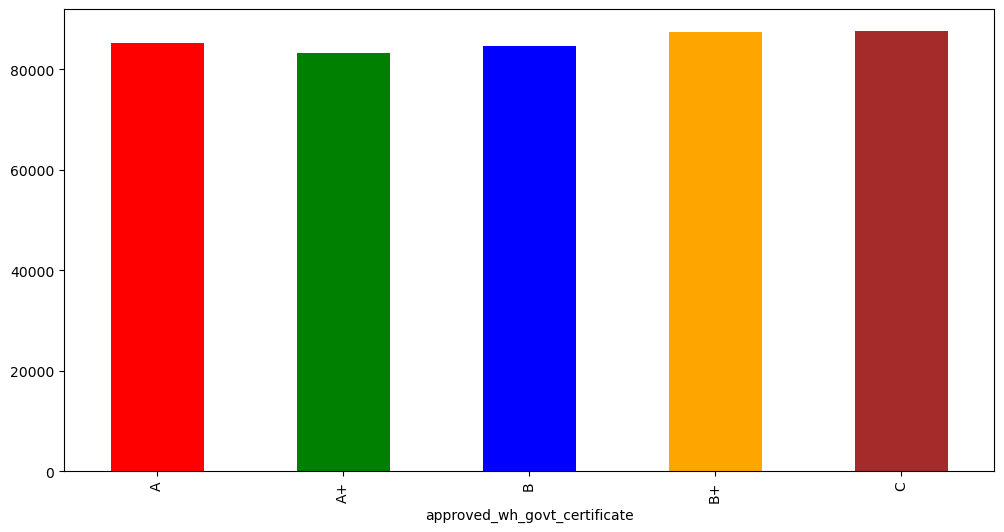

In [130]:
colors = ['red', 'green', 'blue', 'orange', 'brown']
df.groupby(['approved_wh_govt_certificate'])['storage_issue_reported_l3m'].sum().plot(kind="bar", figsize=(12, 6), color=colors)

In [131]:
df.groupby(['approved_wh_govt_certificate'])['product_wg_ton'].sum()

approved_wh_govt_certificate
A     112676348
A+    111974920
B     102299663
B+    105499193
C     120115699
Name: product_wg_ton, dtype: int64

<Axes: xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

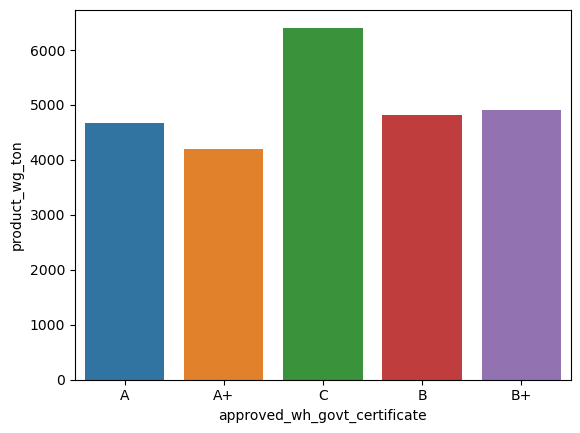

In [132]:
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df1, estimator=len)

In [133]:
df1 = df1.replace({True: 1, False: 0})
df1.head()

Ware_house_ID WH_Manager_ID WH_capacity_size  num_refill_req_l3m  \
0     WH_100000     EID_50000            Small                   3   
1     WH_100001     EID_50001            Large                   0   
2     WH_100002     EID_50002              Mid                   1   
3     WH_100003     EID_50003              Mid                   7   
4     WH_100004     EID_50004            Large                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  distributor_num  \
0                    1                  2             4651               24   
1                    0                  4             6217               47   
2                    0                  4             4306               64   
3                    4                  2             6000               50   
4                    1                  2             4740               42   

   flood_impacted  flood_proof  ...  zone_North  zone_South  zone_West  \
0               0            1  ...           0           0          1   
1               0            0  ...           1           0          0   
2               0            0  ...           0           1          0   
3               0            0  ...           1           0          0   
4               1            0  ...           1           0          0   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3 WH_regional_zone_Zone 4  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        1                        0                       0   
3                        0                        1                       0   
4                        0                        0                       0   

   WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  Location_type_Urban  \
0                        0                        1                    1   
1                        1                        0                    0   
2                        0                        0                    0   
3                        0                        0                    0   
4                        1                        0                    0   

  wh_owner_type_Rented  
0                    1  
1                    0  
2                    0  
3                    1  
4                    0  

[5 rows x 30 columns]

array([[<Axes: xlabel='num_refill_req_l3m', ylabel='num_refill_req_l3m'>,
        <Axes: xlabel='transport_issue_l1y', ylabel='num_refill_req_l3m'>,
        <Axes: xlabel='product_wg_ton', ylabel='num_refill_req_l3m'>,
        <Axes: xlabel='storage_issue_reported_l3m', ylabel='num_refill_req_l3m'>,
        <Axes: xlabel='Location_type_Urban', ylabel='num_refill_req_l3m'>,
        <Axes: xlabel='dist_from_hub', ylabel='num_refill_req_l3m'>],
       [<Axes: xlabel='num_refill_req_l3m', ylabel='transport_issue_l1y'>,
        <Axes: xlabel='transport_issue_l1y', ylabel='transport_issue_l1y'>,
        <Axes: xlabel='product_wg_ton', ylabel='transport_issue_l1y'>,
        <Axes: xlabel='storage_issue_reported_l3m', ylabel='transport_issue_l1y'>,
        <Axes: xlabel='Location_type_Urban', ylabel='transport_issue_l1y'>,
        <Axes: xlabel='dist_from_hub', ylabel='transport_issue_l1y'>],
       [<Axes: xlabel='num_refill_req_l3m', ylabel='product_wg_ton'>,
        <Axes: xlabel='transport

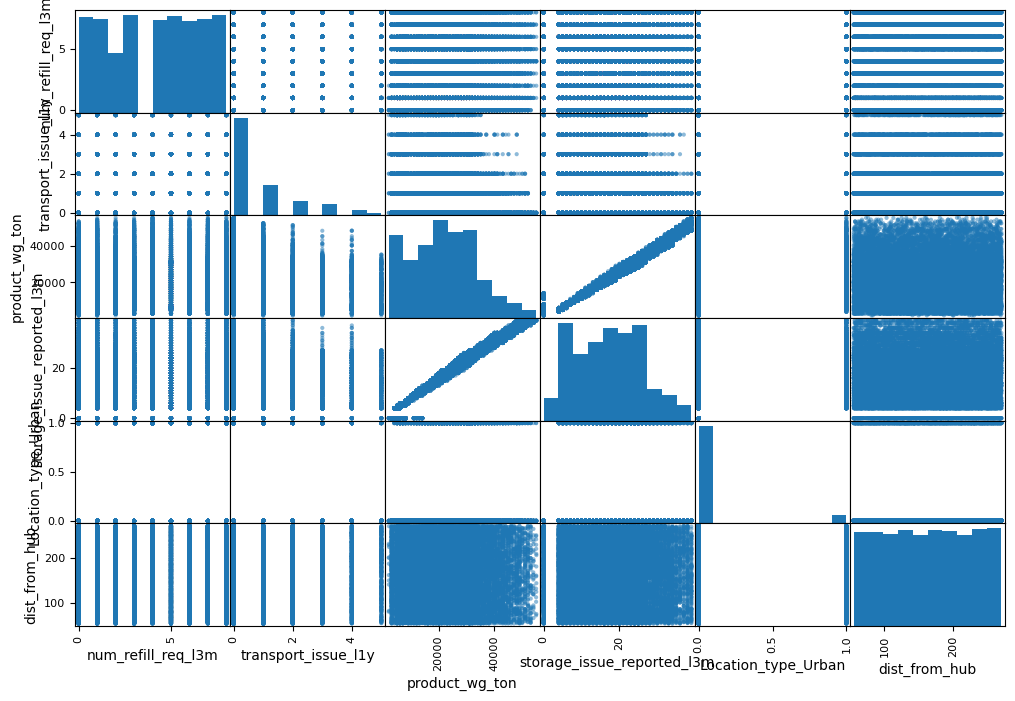

In [134]:
from pandas.plotting import scatter_matrix
attributes=["num_refill_req_l3m","transport_issue_l1y","product_wg_ton","storage_issue_reported_l3m","Location_type_Urban","dist_from_hub"]
scatter_matrix(df1[attributes],figsize=(12,8))

<Axes: xlabel='zone'>

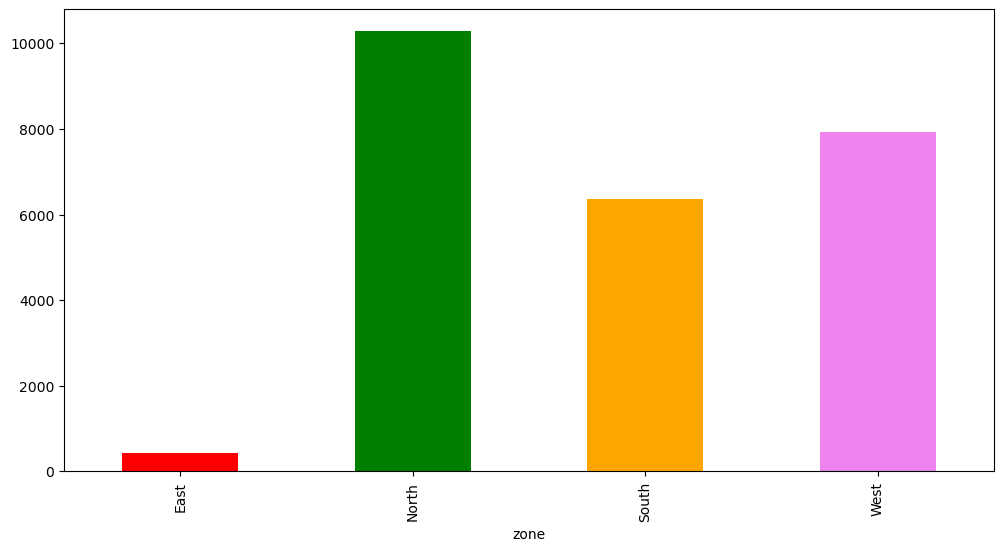

In [135]:
colors = ['red', 'green', 'orange', 'violet']
df.groupby('zone')['Ware_house_ID'].count().plot(kind="bar", figsize=(12, 6), color= colors)

In [40]:
df.groupby('WH_capacity_size')['storage_issue_reported_l3m'].sum()

WH_capacity_size
Large    174247
Mid      172481
Small     81533
Name: storage_issue_reported_l3m, dtype: int64

<Axes: xlabel='WH_capacity_size'>

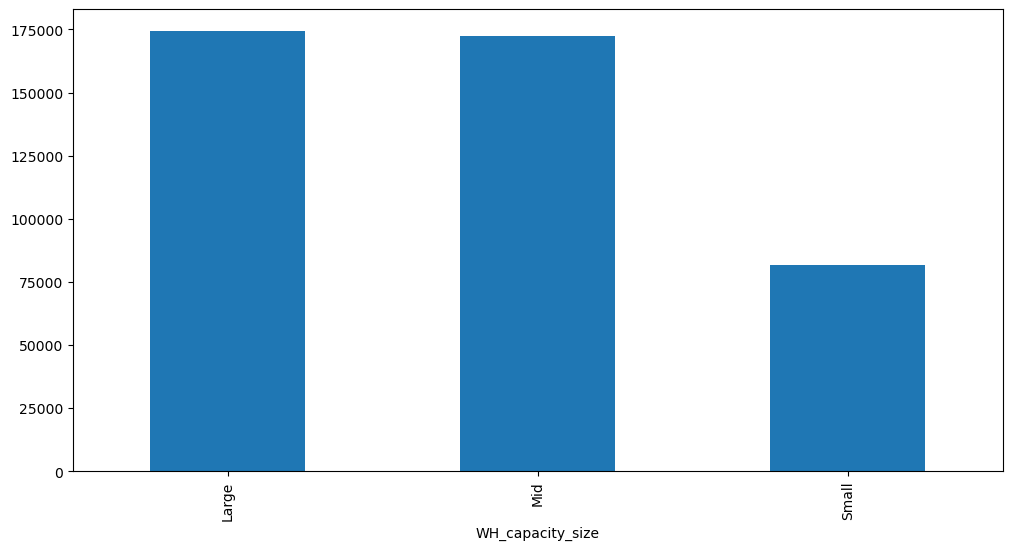

In [136]:
df.groupby('WH_capacity_size')['storage_issue_reported_l3m'].sum().plot(kind="bar", figsize=(12, 6))

<Axes: xlabel='Location_type'>

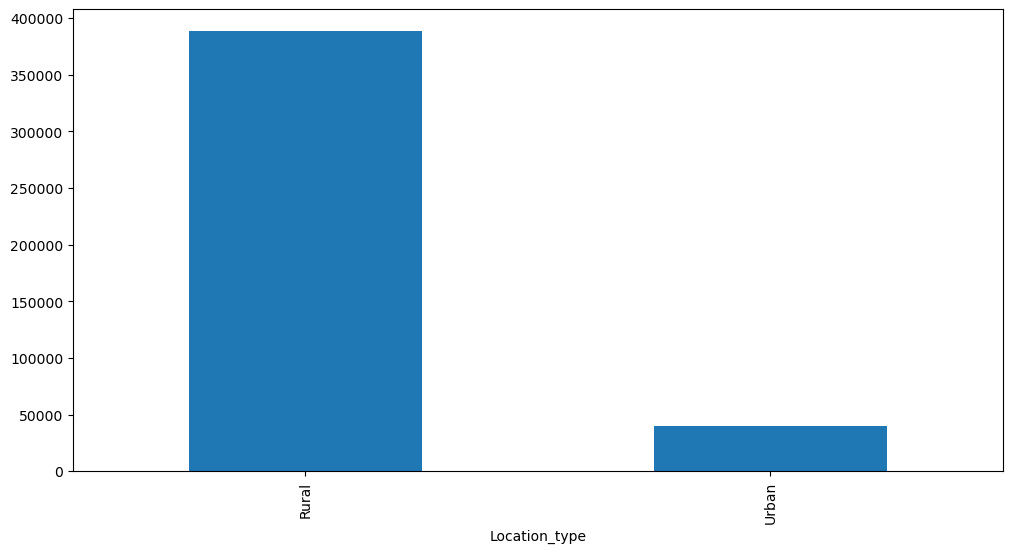

In [137]:
df.groupby('Location_type')['storage_issue_reported_l3m'].sum().plot(kind="bar", figsize=(12, 6))

<Axes: xlabel='product_wg_ton', ylabel='storage_issue_reported_l3m'>

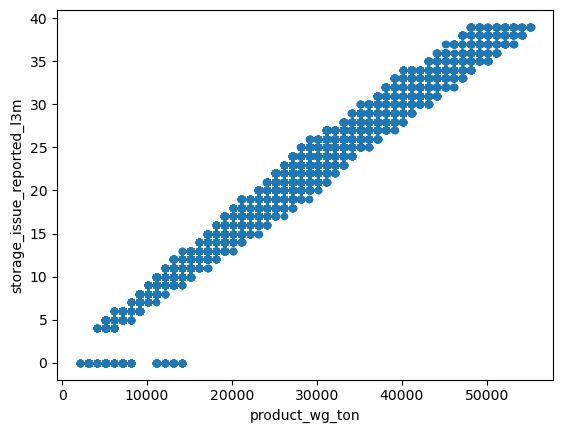

In [138]:
df1.plot(kind="scatter",x="product_wg_ton",y="storage_issue_reported_l3m")

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   WH_capacity_size              25000 non-null  object 
 3   num_refill_req_l3m            25000 non-null  int64  
 4   transport_issue_l1y           25000 non-null  int64  
 5   Competitor_in_mkt             25000 non-null  int64  
 6   retail_shop_num               25000 non-null  int64  
 7   distributor_num               25000 non-null  int64  
 8   flood_impacted                25000 non-null  int64  
 9   flood_proof                   25000 non-null  int64  
 10  electric_supply               25000 non-null  int64  
 11  dist_from_hub                 25000 non-null  int64  
 12  workers_num                   25000 non-null  float64
 13  s

In [140]:
df1=df1.drop(['Ware_house_ID', 'WH_Manager_ID','WH_regional_zone_Zone 3','WH_regional_zone_Zone 4','color','WH_regional_zone_Zone 5','WH_regional_zone_Zone 2','WH_regional_zone_Zone 6','Location_type_Urban','wh_owner_type_Rented'], axis=1)

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WH_capacity_size              25000 non-null  object 
 1   num_refill_req_l3m            25000 non-null  int64  
 2   transport_issue_l1y           25000 non-null  int64  
 3   Competitor_in_mkt             25000 non-null  int64  
 4   retail_shop_num               25000 non-null  int64  
 5   distributor_num               25000 non-null  int64  
 6   flood_impacted                25000 non-null  int64  
 7   flood_proof                   25000 non-null  int64  
 8   electric_supply               25000 non-null  int64  
 9   dist_from_hub                 25000 non-null  int64  
 10  workers_num                   25000 non-null  float64
 11  storage_issue_reported_l3m    25000 non-null  int64  
 12  temp_reg_mach                 25000 non-null  int64  
 13  a

In [142]:
numerical_cols = df1.select_dtypes(include=['number'])

In [143]:
numerical_cols

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                       3                    1                  2   
1                       0                    0                  4   
2                       1                    0                  4   
3                       7                    4                  2   
4                       3                    1                  2   
...                   ...                  ...                ...   
24995                   3                    0                  4   
24996                   6                    0                  4   
24997                   7                    0                  2   
24998                   1                    0                  2   
24999                   8                    2                  4   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0                 4651               24               0            1   
1                 6217               47               0            0   
2                 4306               64               0            0   
3                 6000               50               0            0   
4                 4740               42               1            0   
...                ...              ...             ...          ...   
24995             5390               19               0            0   
24996             4490               57               0            0   
24997             5403               31               1            0   
24998            10562               25               0            0   
24999             5664               21               0            1   

       electric_supply  dist_from_hub  workers_num  \
0                    1             91    29.000000   
1                    1            210    31.000000   
2                    0            161    37.000000   
3                    0            103    21.000000   
4                    1            112    25.000000   
...                ...            ...          ...   
24995                1            142    34.000000   
24996                1            130    28.000000   
24997                1            147    28.944398   
24998                1             60    25.000000   
24999                1            239    39.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                              13              0                 5   
1                               4              0                 3   
2                              17              0                 6   
3                              17              1                 3   
4                              18              0                 6   
...                           ...            ...               ...   
24995                          22              1                 2   
24996                          10              0                 4   
24997                          23              0                 5   
24998                          18              0                 6   
24999                           4              0                 2   

       govt_check_l3m  product_wg_ton  zone_North  zone_South  zone_West  
0                  15           17115           0           0          1  
1                  17            5074           1           0          0  
2                  22           23137           0           1          0  
3                  27           22115           1           0          0  
4                  24           24071           1           0          0  
...               ...             ...         ...         ...        ...  
24995              30           32093           1           0          0  
24996              18           12114           0           0          1  
24997              25           27080           0           1          0  
24998              30           25093           1           0          0 

In [144]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['A+', 'A', 'B+', 'B', 'C'], ['Small', 'Mid', 'Large']]
encoder = OrdinalEncoder(categories=categories)
df1[['approved_wh_govt_certificate','WH_capacity_size']] = encoder.fit_transform(df1[['approved_wh_govt_certificate','WH_capacity_size']])


In [145]:
df1[['approved_wh_govt_certificate','WH_capacity_size']]

approved_wh_govt_certificate  WH_capacity_size
0                               1.0               0.0
1                               1.0               2.0
2                               1.0               1.0
3                               0.0               1.0
4                               4.0               2.0
...                             ...               ...
24995                           1.0               0.0
24996                           3.0               1.0
24997                           2.0               2.0
24998                           1.0               0.0
24999                           2.0               1.0

[25000 rows x 2 columns]

In [146]:
df1.corr()

WH_capacity_size  num_refill_req_l3m  \
WH_capacity_size                      1.000000            0.007054   
num_refill_req_l3m                    0.007054            1.000000   
transport_issue_l1y                  -0.011046            0.018549   
Competitor_in_mkt                    -0.014475            0.002985   
retail_shop_num                      -0.068853           -0.001186   
distributor_num                       0.001268            0.003995   
flood_impacted                       -0.008304           -0.010548   
flood_proof                           0.001003           -0.001123   
electric_supply                       0.009338           -0.007959   
dist_from_hub                         0.001837            0.000048   
workers_num                           0.000756           -0.013495   
storage_issue_reported_l3m            0.005454           -0.006602   
temp_reg_mach                         0.001056            0.260928   
approved_wh_govt_certificate         -0.002933           -0.007352   
wh_breakdown_l3m                      0.000357            0.000608   
govt_check_l3m                        0.146946           -0.003302   
product_wg_ton                        0.004425            0.001415   
zone_North                            0.163964           -0.006648   
zone_South                           -0.158588           -0.003082   
zone_West                            -0.011182            0.010150   

                              transport_issue_l1y  Competitor_in_mkt  \
WH_capacity_size                        -0.011046          -0.014475   
num_refill_req_l3m                       0.018549           0.002985   
transport_issue_l1y                      1.000000          -0.005826   
Competitor_in_mkt                       -0.005826           1.000000   
retail_shop_num                         -0.001826          -0.156943   
distributor_num                          0.008993          -0.001492   
flood_impacted                          -0.009596           0.009338   
flood_proof                              0.000022          -0.003444   
electric_supply                         -0.009299           0.001759   
dist_from_hub                            0.014336           0.008407   
workers_num                             -0.008832           0.000049   
storage_issue_reported_l3m              -0.144327           0.009543   
temp_reg_mach                            0.018207           0.009524   
approved_wh_govt_certificate            -0.002430          -0.007526   
wh_breakdown_l3m                         0.012990           0.012733   
govt_check_l3m                           0.002190          -0.043455   
product_wg_ton                          -0.173992           0.008884   
zone_North                               0.005159          -0.088225   
zone_South                               0.000448          -0.302852   
zone_West                               -0.006381           0.308257   

                              retail_shop_num  distributor_num  \
WH_capacity_size                    -0.068853         0.001268   
num_refill_req_l3m                  -0.001186         0.003995   
transport_issue_l1y                 -0.001826         0.008993   
Competitor_in_mkt                   -0.156943        -0.001492   
retail_shop_num                      1.000000        -0.000395   
distributor_num                     -0.000395         1.000000   
flood_impacted                      -0.003774         0.004611   
flood_proof                          0.007223        -0.003409   
electric_supply                     -0.009207         0.000454   
dist_from_hub                        0.000429        -0.011838   
workers_num                         -0.005300        -0.014373   
storage_issue_reported_l3m          -0.006632         0.003396   
temp_reg_mach                       -0.001273         0.002827   
approved_wh_govt_certificate         0.005853        -0.003722   
wh_breakdown_l3m                    -0.008420         0.

<Axes: >

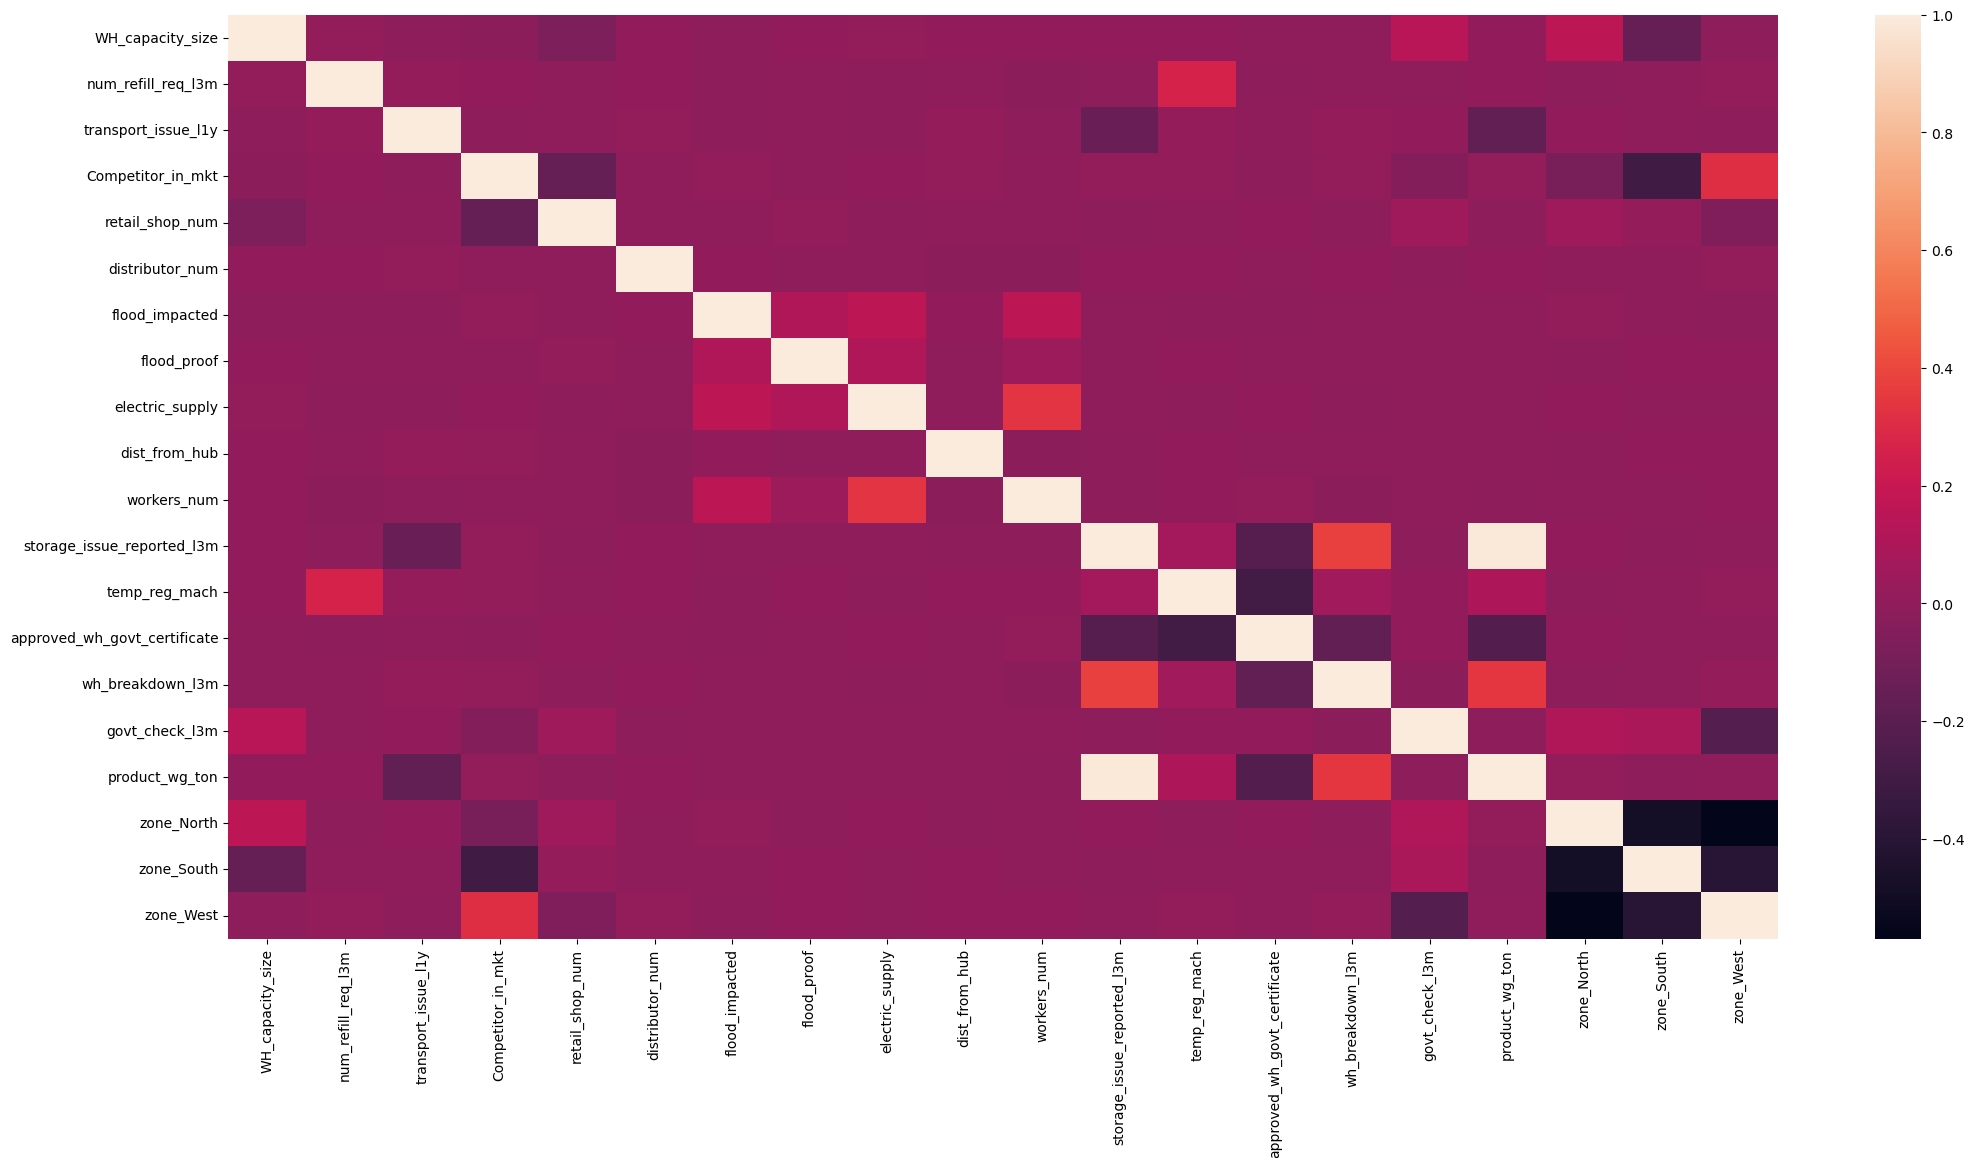

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
sns.heatmap(data=df1.corr())

In [148]:
target_corr= df1.corr()['product_wg_ton'].abs().sort_values(ascending=False)

In [149]:
print(target_corr)

product_wg_ton                  1.000000
storage_issue_reported_l3m      0.986777
wh_breakdown_l3m                0.342685
approved_wh_govt_certificate    0.229731
transport_issue_l1y             0.173992
temp_reg_mach                   0.101638
Competitor_in_mkt               0.008884
zone_South                      0.008513
govt_check_l3m                  0.008500
workers_num                     0.008184
zone_North                      0.006968
retail_shop_num                 0.006615
dist_from_hub                   0.005017
distributor_num                 0.004999
WH_capacity_size                0.004425
flood_impacted                  0.002299
electric_supply                 0.002160
num_refill_req_l3m              0.001415
zone_West                       0.001365
flood_proof                     0.000441
Name: product_wg_ton, dtype: float64


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X=df1.drop(['num_refill_req_l3m','WH_capacity_size','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num','temp_reg_mach','approved_wh_govt_certificate','product_wg_ton','zone_North','govt_check_l3m','zone_South','zone_West',],axis=1)
y=df1['product_wg_ton']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
print(X.shape,y.shape)

(25000, 2) (25000,)


In [152]:
X.head()

storage_issue_reported_l3m  wh_breakdown_l3m
0                          13                 5
1                           4                 3
2                          17                 6
3                          17                 3
4                          18                 6

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [154]:
y_pred=model.predict(X_test)

In [155]:
y_pred

array([ 6856.64337456, 16750.58702369, 11686.13161582, ...,
       31474.01891408,  6151.74187475, 25613.38398746])

In [156]:
y_pred.reshape(-1,1)

array([[ 6856.64337456],
       [16750.58702369],
       [11686.13161582],
       ...,
       [31474.01891408],
       [ 6151.74187475],
       [25613.38398746]])

In [157]:
y_test

6868      6058
24016    17073
9668     11101
13640    31095
14018    17134
         ...  
8670     12065
11839    38057
4013     31105
21147     7078
695      25084
Name: product_wg_ton, Length: 5000, dtype: int64

In [158]:
print(f"Model Coefficient (Slope): {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-squared Score (R²): {r2_score(y_test, y_pred)}")

Model Coefficient (Slope): 1266.113851966818
Model Intercept: 1230.9756145387291
Mean Absolute Error (MAE): 1371.7561915481992
Mean Squared Error (MSE): 3420073.5338076353
R-squared Score (R²): 0.9744388852027114


In [159]:
print(X_test.shape,y_pred.shape)

(5000, 2) (5000,)


In [160]:
X_test.head()

storage_issue_reported_l3m  wh_breakdown_l3m
6868                            5                 3
24016                          13                 4
9668                            9                 4
13640                          25                 5
14018                          15                 4

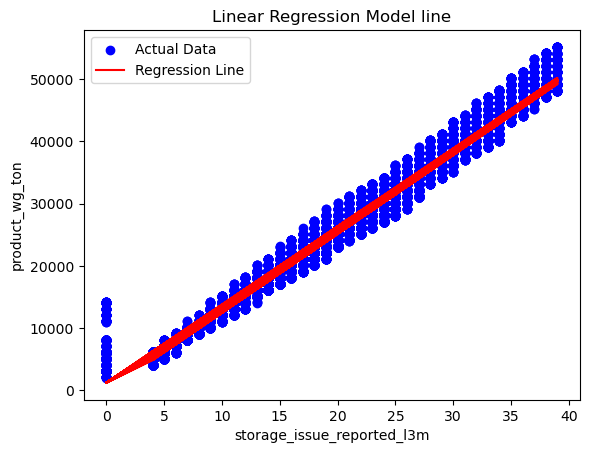

In [161]:
plt.scatter(X['storage_issue_reported_l3m'], y, color='blue', label="Actual Data")
plt.plot(X_test['storage_issue_reported_l3m'],model.predict(X_test),color='red', label="Regression Line")
plt.xlabel("storage_issue_reported_l3m")
plt.ylabel("product_wg_ton")
plt.title("Linear Regression Model line")
plt.legend()
plt.show()

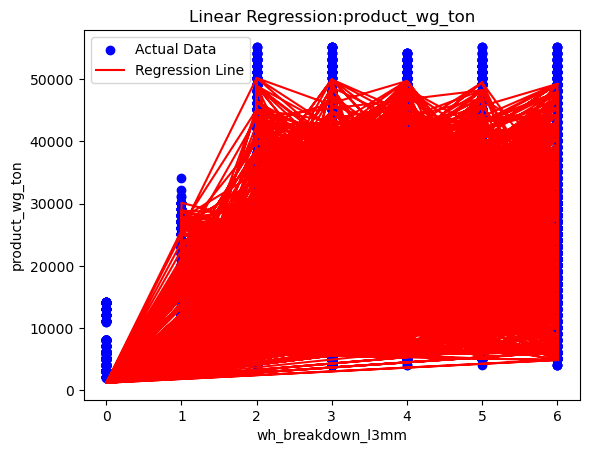

In [162]:
plt.scatter(X['wh_breakdown_l3m'], y, color='blue', label="Actual Data")
plt.plot(X_test['wh_breakdown_l3m'],model.predict(X_test),color='red', label="Regression Line")
plt.xlabel("wh_breakdown_l3mm")
plt.ylabel("product_wg_ton")
plt.title("Linear Regression:product_wg_ton")
plt.legend()
plt.show()

In [74]:
X_test.head()

storage_issue_reported_l3m  wh_breakdown_l3m
6868                            5                 3
24016                          13                 4
9668                            9                 4
13640                          25                 5
14018                          15                 4

In [75]:
y_test.head()

6868      6058
24016    17073
9668     11101
13640    31095
14018    17134
Name: product_wg_ton, dtype: int64

In [76]:
random_input= pd.DataFrame([[25,5]],columns=['storage_issue_reported_l3m','wh_breakdown_l3m'])

In [77]:
predict=model.predict(random_input)

In [78]:
predict

array([31708.98608069])

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
print("MSE scores for each fold:", -scores)  # Negative because sklearn wants higher = better
print("Average MSE:", -np.mean(scores))

MSE scores for each fold: [3404703.73086278 3371761.38087581 3625526.67629037 3245243.05365078
 3384183.81960019]
Average MSE: 3406283.7322559864


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X=df1.drop(['num_refill_req_l3m','WH_capacity_size','wh_breakdown_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num','temp_reg_mach','approved_wh_govt_certificate','product_wg_ton','zone_North','govt_check_l3m','zone_South','zone_West',],axis=1)
y=df1['product_wg_ton']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model_rf = RandomForestRegressor().fit(X_train,y_train)

In [82]:
predictions = model_rf.predict(X_test)

In [83]:
predictions

array([ 6407.50163698, 16760.80936706, 11610.8422066 , ...,
       31275.046638  ,  6407.50163698, 25354.53540794])

In [84]:
y_test

6868      6058
24016    17073
9668     11101
13640    31095
14018    17134
         ...  
8670     12065
11839    38057
4013     31105
21147     7078
695      25084
Name: product_wg_ton, Length: 5000, dtype: int64

In [85]:
model_rf.predict([[25]])

C:\Users\Sonam Gupta\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([31275.046638])

In [86]:
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, predictions)}")
print(f"R-squared Score (R²): {r2_score(y_test, predictions)}")

Mean Absolute Error (MAE): 1161.9487525389543
Mean Squared Error (MSE): 2309447.8093573516
R-squared Score (R²): 0.9827395346942707


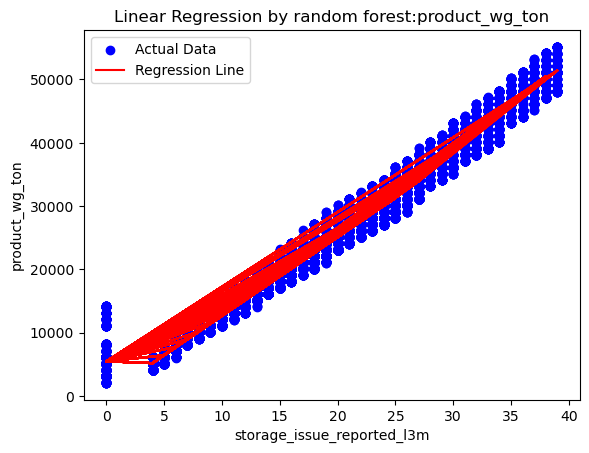

In [87]:
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X_test,model_rf.predict(X_test),color='red', label="Regression Line")
plt.xlabel("storage_issue_reported_l3m")
plt.ylabel("product_wg_ton")
plt.title("Linear Regression by random forest:product_wg_ton")
plt.legend()
plt.show()

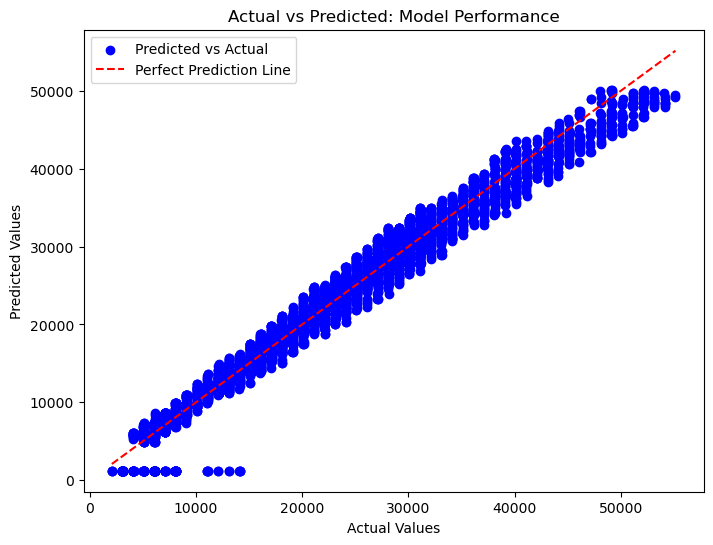

In [89]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Add a line where y = x (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted: Model Performance")
plt.legend()
plt.show()